# Solve a Linear System with LU decomposition

In [1]:
import time
import numpy as np
import scipy
import scipy.linalg as la
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
print ("numpy version:[%s]"%(np.__version__))
print ("scipy version:[%s]"%(scipy.__version__))

numpy version:[1.24.2]
scipy version:[1.10.1]


### There are three ways to solve $A\mathbf{x} = \mathbf{b}$

In [2]:
d = 1000
A = np.random.randn(d,d)
b = np.random.randn(d)

#### 1. $\mathbf{x} = A^{-1} \mathbf{b}$

In [3]:
t_start = time.time()
A_inv = np.linalg.inv(A)
x1 = np.matmul(A_inv,b)
esec = time.time() - t_start
print (" It took [%.4f]sec"%(esec))

 It took [0.0505]sec


#### 2. Use ```np.linalg.solve```

In [4]:
t_start = time.time()
x2 = np.linalg.solve(A,b)
esec = time.time() - t_start
print (" It took [%.4f]sec"%(esec))

 It took [0.0476]sec


#### 3. Use LU decomposition

In [5]:
t_start = time.time()
lu, piv = la.lu_factor(A)
x3 = la.lu_solve((lu, piv), b)
esec = time.time() - t_start
print (" It took [%.4f]sec"%(esec))

 It took [0.2692]sec


#### 4. Assuming that we already have LU

In [6]:
lu, piv = la.lu_factor(A)
t_start = time.time()
x4 = la.lu_solve((lu, piv), b)
esec = time.time() - t_start
print (" It took [%.4f]sec"%(esec))

 It took [0.0004]sec


#### Check the solutions

In [7]:
err1 = np.linalg.norm(np.matmul(A,x1)-b)
err2 = np.linalg.norm(np.matmul(A,x2)-b)
err3 = np.linalg.norm(np.matmul(A,x3)-b)
print ("err1:[%.2e] err2:[%.2e] err3:[%.2e]."%(err1,err2,err3))

err1:[3.32e-11] err2:[1.47e-11] err3:[1.47e-11].


### Check over different dimensions

In [8]:
n_trial = 10
ds = np.linspace(10,5000,10).astype(int)
esec_inv,esec_solve,esec_lu_solve,esec_lu_only = [],[],[],[]
for d_idx,d in enumerate(ds):
    print ("[%d/%d] d:[%d]."%(d_idx,len(ds),d))
    # 1. inv
    esec_total = 0
    for _ in range(n_trial):
        A = np.random.randn(d,d)
        b = np.random.randn(d)
        t_start = time.time() # from here
        A_inv = np.linalg.inv(A)
        x1 = np.matmul(A_inv,b)
        esec = time.time() - t_start # to here
        esec_total += esec 
    esec_avg = esec_total/n_trial
    esec_inv.append(esec_avg)
    
    # 2. np.linalg.solve
    esec_total = 0
    for _ in range(n_trial):
        A = np.random.randn(d,d)
        b = np.random.randn(d)
        t_start = time.time() # from here
        x2 = np.linalg.solve(A,b)
        esec = time.time() - t_start # to here
        esec_total += esec 
    esec_avg = esec_total/n_trial
    esec_solve.append(esec_avg)
    
    # 3. LU decomposition + backward substitution
    esec_total = 0
    for _ in range(n_trial):
        A = np.random.randn(d,d)
        b = np.random.randn(d)
        t_start = time.time() # from here
        lu, piv = la.lu_factor(A)
        x3 = la.lu_solve((lu, piv), b)
        esec = time.time() - t_start # to here
        esec_total += esec 
    esec_avg = esec_total/n_trial
    esec_lu_solve.append(esec_avg)
    
    # 5. Backward substitution
    esec_total = 0
    for _ in range(n_trial):
        A = np.random.randn(d,d)
        b = np.random.randn(d)
        lu, piv = la.lu_factor(A)
        t_start = time.time() # from here
        x4 = la.lu_solve((lu, piv), b)
        esec = time.time() - t_start # to here
        esec_total += esec 
    esec_avg = esec_total/n_trial
    esec_lu_only.append(esec_avg)
print ("Done.")
# Save when finished
esecs_inv,esecs_solve = np.asarray(esec_inv),np.asarray(esec_solve)
esecs_lu_solve,esecs_lu_only = np.asarray(esec_lu_solve),np.asarray(esec_lu_only)
npz_path = 'linear_system_solve_results.npz'
np.savez(npz_path,ds=ds,esecs_inv=esecs_inv,esecs_solve=esecs_solve,
         esecs_lu_solve=esecs_lu_solve,esecs_lu_only=esecs_lu_only)
print ("[%s] saved."%(npz_path))

[0/10] d:[10].
[1/10] d:[564].
[2/10] d:[1118].
[3/10] d:[1673].
[4/10] d:[2227].
[5/10] d:[2782].
[6/10] d:[3336].
[7/10] d:[3891].
[8/10] d:[4445].
[9/10] d:[5000].
Done.
[linear_system_solve_results.npz] saved.


### Plot results

In [9]:
# Load
npz_path = 'linear_system_solve_results.npz'
l = np.load(npz_path)
ds,esecs_inv,esecs_solve = l['ds'],l['esecs_inv'],l['esecs_solve']
esecs_lu_solve,esecs_lu_only = l['esecs_lu_solve'],l['esecs_lu_only']
print ("[%s] loaded."%(npz_path))

[linear_system_solve_results.npz] loaded.


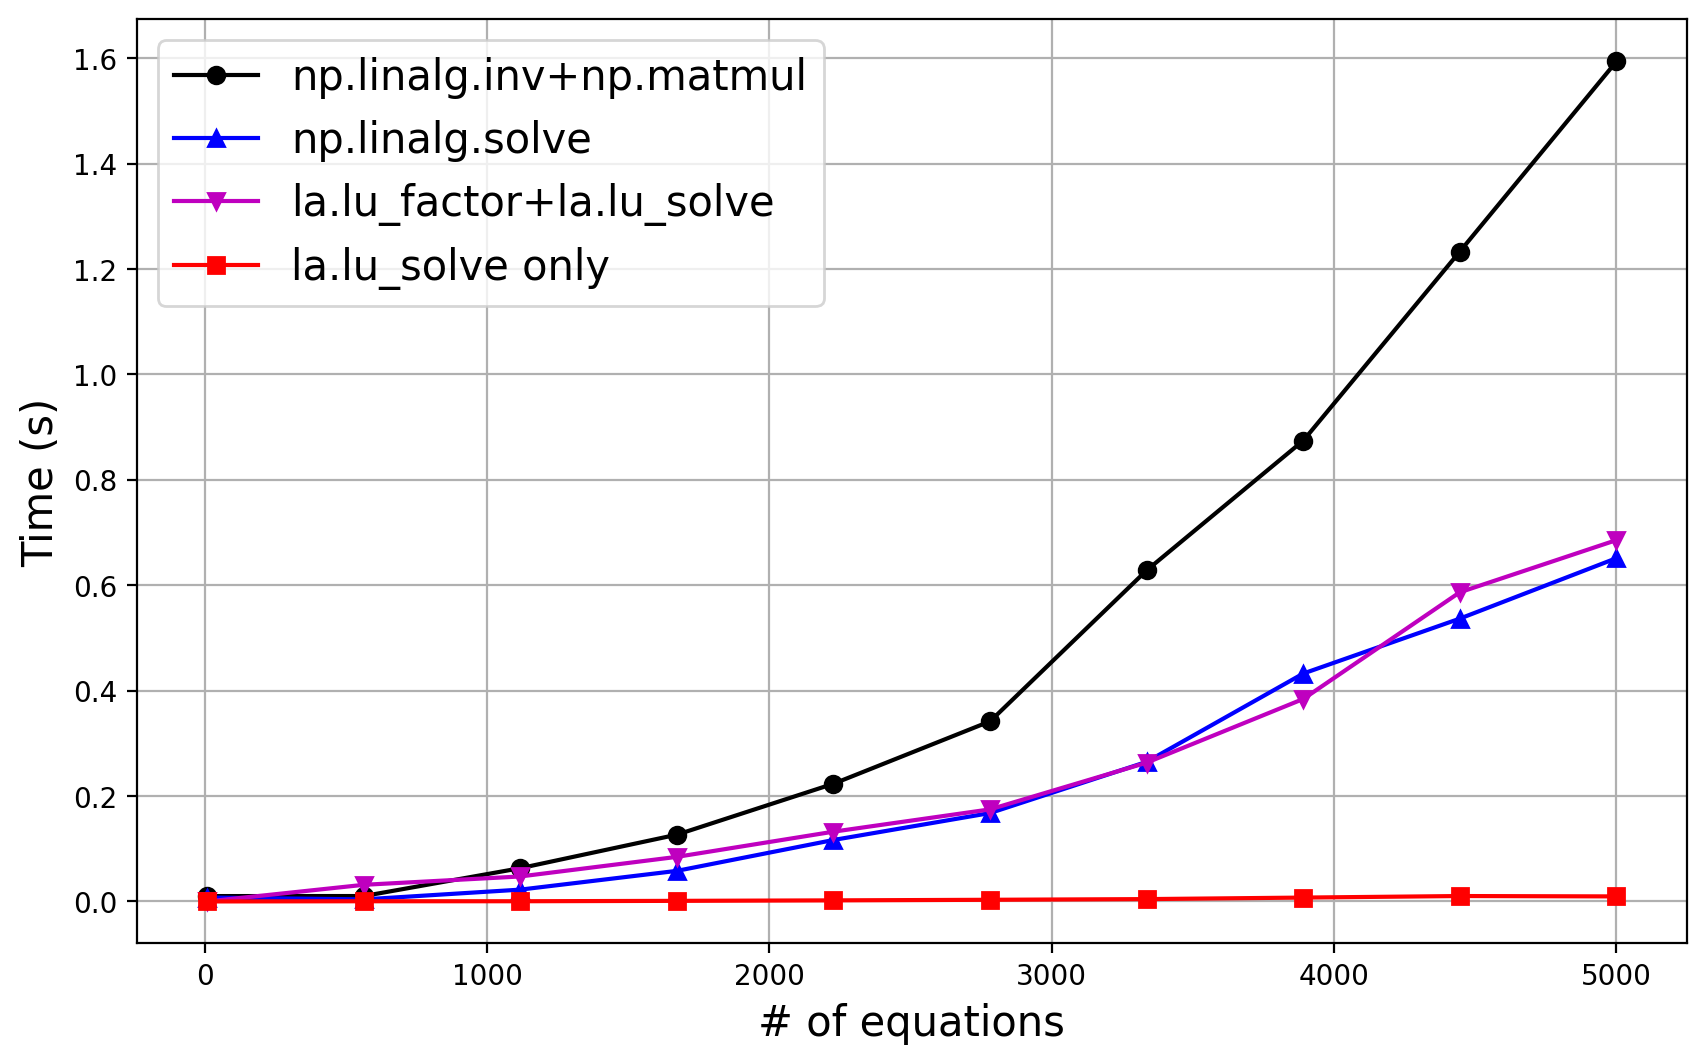

In [10]:
plt.figure(figsize=(10,6))
plt.plot(ds,esecs_inv,'ko-',label='np.linalg.inv+np.matmul')
plt.plot(ds,esecs_solve,'b^-',label='np.linalg.solve')
plt.plot(ds,esecs_lu_solve,'mv-',label='la.lu_factor+la.lu_solve')
plt.plot(ds,esecs_lu_only,'rs-',label='la.lu_solve only')
plt.xlabel("# of equations",fontsize=15)
plt.ylabel("Time (s)",fontsize=15)
plt.grid(True, which="both", ls="-")
plt.legend(fontsize=15)
plt.show()